# Project 4 - Part 2: Movie Recommendation System Using Memory Based Collaborative Filtering

- Nikita Mandhan

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

#### Loading Data

In [3]:
df_movies = pd.read_csv('movies.csv')

In [4]:
df_ratings = pd.read_csv('ratings.csv')

In [5]:
df_links = pd.read_csv('links.csv')

In [6]:
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [7]:
df_ratings

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434


In [8]:
df_links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
62418,209157,6671244,499546.0
62419,209159,297986,63407.0
62420,209163,6755366,553036.0
62421,209169,249603,162892.0


#### Merge Movies and Ratings Data


In [9]:
# Merge movies and ratings
df_merged = pd.merge(df_ratings, df_movies, on='movieId')

In [10]:
df_merged

,userId,movieId,rating,timestamp,title,genres
0,1,296,5.0,1147880044,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,3,296,5.0,1439474476,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
2,4,296,4.0,1573938898,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,5,296,4.0,830786155,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
4,7,296,4.0,835444730,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
...,...,...,...,...,...,...
25000090,162358,200192,2.0,1553453039,Den frusna leoparden (1986),(no genres listed)
25000091,162358,200194,2.0,1553453843,Tough Luck (2004),Action|Adventure|Thriller
25000092,162386,139970,3.5,1549215965,I Don't Speak English (1995),Comedy
25000093,162386,200726,4.0,1554651417,The Graduates (1995),Children|Drama


In [11]:
df_merged = df_merged[['userId', 'movieId', 'title', 'genres', 'rating', 'timestamp']]

In [12]:
df_merged = pd.merge(df_merged, df_links, on='movieId')

In [13]:
df_merged = df_merged.drop(['timestamp', 'tmdbId'], axis=1)

### Data Preprocessing


In [14]:
df_merged.to_csv('movie_lens_data.csv', index=False)

In [15]:
df = pd.read_csv('movie_lens_data.csv')

In [16]:
df

,userId,movieId,title,genres,rating,imdbId
0,1,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,5.0,110912
1,3,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,5.0,110912
2,4,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.0,110912
3,5,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.0,110912
4,7,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.0,110912
...,...,...,...,...,...,...
25000090,162358,200192,Den frusna leoparden (1986),(no genres listed),2.0,91087
25000091,162358,200194,Tough Luck (2004),Action|Adventure|Thriller,2.0,376263
25000092,162386,139970,I Don't Speak English (1995),Comedy,3.5,113436
25000093,162386,200726,The Graduates (1995),Children|Drama,4.0,113623


In [17]:
# Extract year from title and create a new column
df['year'] = df['title'].str.extract(r'\((\d{4})\)')
df['title'] = df['title'].str.replace(r'\(\d{4}\)', '').str.strip()

/tmp/ipykernel_18/384648834.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['title'] = df['title'].str.replace(r'\(\d{4}\)', '').str.strip()


In [18]:
df = df[['userId', 'movieId', 'title', 'year', 'genres', 'rating', 'imdbId']]
df

,userId,movieId,title,year,genres,rating,imdbId
0,1,296,Pulp Fiction,1994,Comedy|Crime|Drama|Thriller,5.0,110912
1,3,296,Pulp Fiction,1994,Comedy|Crime|Drama|Thriller,5.0,110912
2,4,296,Pulp Fiction,1994,Comedy|Crime|Drama|Thriller,4.0,110912
3,5,296,Pulp Fiction,1994,Comedy|Crime|Drama|Thriller,4.0,110912
4,7,296,Pulp Fiction,1994,Comedy|Crime|Drama|Thriller,4.0,110912
...,...,...,...,...,...,...,...
25000090,162358,200192,Den frusna leoparden,1986,(no genres listed),2.0,91087
25000091,162358,200194,Tough Luck,2004,Action|Adventure|Thriller,2.0,376263
25000092,162386,139970,I Don't Speak English,1995,Comedy,3.5,113436
25000093,162386,200726,The Graduates,1995,Children|Drama,4.0,113623


In [19]:
# Replacing the pipe '|' with a comma ',' in the genres column
df['genres'] = df['genres'].str.replace('|', ',', regex=False)
df

,userId,movieId,title,year,genres,rating,imdbId
0,1,296,Pulp Fiction,1994,"Comedy,Crime,Drama,Thriller",5.0,110912
1,3,296,Pulp Fiction,1994,"Comedy,Crime,Drama,Thriller",5.0,110912
2,4,296,Pulp Fiction,1994,"Comedy,Crime,Drama,Thriller",4.0,110912
3,5,296,Pulp Fiction,1994,"Comedy,Crime,Drama,Thriller",4.0,110912
4,7,296,Pulp Fiction,1994,"Comedy,Crime,Drama,Thriller",4.0,110912
...,...,...,...,...,...,...,...
25000090,162358,200192,Den frusna leoparden,1986,(no genres listed),2.0,91087
25000091,162358,200194,Tough Luck,2004,"Action,Adventure,Thriller",2.0,376263
25000092,162386,139970,I Don't Speak English,1995,Comedy,3.5,113436
25000093,162386,200726,The Graduates,1995,"Children,Drama",4.0,113623


#### Dataframe Summary


In [20]:
# Display the dimensions of the dataframe
print("Dimension of the dataframe is",df.shape)

Dimension of the dataframe is (25000095, 7)


In [21]:
# Display a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 7 columns):
 #   Column   Dtype  
---  ------   -----  
 0   userId   int64  
 1   movieId  int64  
 2   title    object 
 3   year     object 
 4   genres   object 
 5   rating   float64
 6   imdbId   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 1.3+ GB


In [22]:
#count the number of null values in each column
df.isnull().sum()

userId         0
movieId        0
title          0
year       11740
genres         0
rating         0
imdbId         0
dtype: int64

#### Data Type Analysis


In [23]:
# Identifying columns based on their data types

#columns with float values
float_columns = df.columns[df.dtypes==np.float64].tolist()

#columns with object values
object_columns = df.columns[df.dtypes==object].tolist()

#columns with numeric values
numeric_columns = df.columns[df.dtypes==np.int64].tolist()

print("Number of columns with float values: ", len(float_columns))
print('\n')
print("The columns are:", float_columns)
print('\n')
print("-----------------------------------------------------------------------------------------------------------------")
print('\n')
print("Number of columns with numeric values: ", len(numeric_columns))
print('\n')
print("The columns are:", numeric_columns)
print('\n')
print("-----------------------------------------------------------------------------------------------------------------")
print('\n')
print("Number of columns with object values: ", len(object_columns))
print('\n')
print("The columns are:", object_columns)
print('\n')
print("-----------------------------------------------------------------------------------------------------------------")
print('\n')

Number of columns with float values:  1


The columns are: ['rating']


-----------------------------------------------------------------------------------------------------------------


Number of columns with numeric values:  3


The columns are: ['userId', 'movieId', 'imdbId']


-----------------------------------------------------------------------------------------------------------------


Number of columns with object values:  3


The columns are: ['title', 'year', 'genres']


-----------------------------------------------------------------------------------------------------------------




In [24]:
#Summary statistics for all float columns
float_values_summary = df[float_columns].describe().transpose()
float_values_summary = float_values_summary.rename(columns={'count': 'Count', 'mean': 'Mean', 'std': 'Standard Deviation', 'min':'Minimum','max':'Maximum'})
float_values_summary

,Count,Mean,Standard Deviation,Minimum,25%,50%,75%,Maximum
rating,25000095.0,3.533854,1.060744,0.5,3.0,3.5,4.0,5.0


In [25]:
#Summary statistics for all numeric columns
numeric_values_summary = df[numeric_columns].describe().transpose()
numeric_values_summary = numeric_values_summary.rename(columns={'count': 'Count', 'mean': 'Mean', 'std': 'Standard Deviation', 'min':'Minimum','max':'Maximum'})
numeric_values_summary

,Count,Mean,Standard Deviation,Minimum,25%,50%,75%,Maximum
userId,25000095.0,81189.281154,46791.715897,1.0,40510.0,80914.0,121557.0,162541.0
movieId,25000095.0,21387.981943,39198.862101,1.0,1196.0,2947.0,8623.0,209171.0
imdbId,25000095.0,395565.283590,766669.443597,1.0,99088.0,118617.0,318462.0,11170942.0


In [26]:
#Summary statistics for all string variables
obj_values_summary = df[object_columns].describe().transpose()
obj_values_summary = obj_values_summary.rename(columns={'count': 'Count', 'unique': 'Unique', 'top': 'Top', 'freq': 'Frequency'})
obj_values_summary

,Count,Unique,Top,Frequency
title,25000095,55463,Forrest Gump,81491
year,24988355,135,1995,1497480
genres,25000095,1621,Drama,1765705


In [27]:
max_min_numeric_columns = pd.DataFrame(columns = ['Column Name','Maximum Value', 'Minimum Value'])
#finding the maximum and minimum values in every numeric column
for column in numeric_columns:
    max_val = df[column].max()
    min_val = df[column].min()
    temp_df = pd.DataFrame({"Column Name": [column], "Maximum Value": [max_val], "Minimum Value": [min_val]})
    max_min_numeric_columns = pd.concat([max_min_numeric_columns, temp_df], ignore_index=True)  
    
max_min_numeric_columns

,Column Name,Maximum Value,Minimum Value
0,userId,162541,1
1,movieId,209171,1
2,imdbId,11170942,1


In [28]:
max_min_float_columns = pd.DataFrame(columns = ['Column Name','Maximum Value', 'Minimum Value'])
#finding the maximum and minimum values in every float column
for column in float_columns:
    max_val = df[column].max()
    min_val = df[column].min()
    temp_df = pd.DataFrame({"Column Name": [column], "Maximum Value": [max_val], "Minimum Value": [min_val]})
    max_min_float_columns = pd.concat([max_min_float_columns, temp_df], ignore_index=True)
    
max_min_float_columns

,Column Name,Maximum Value,Minimum Value
0,rating,5.0,0.5


In [29]:
#number of unique values in each column of the dataframe
for col in df.columns:
    print(f'The number of unique values in {col}:',len(df[col].unique()))
    #If the number of unique values is equal to the number of rows, the column can be dropped as it does not provide any useful information.
    if len(df[col].unique())==len(df):
        print(f'This {col} can be dropped')

The number of unique values in userId: 162541
The number of unique values in movieId: 59047
The number of unique values in title: 55463
The number of unique values in year: 136
The number of unique values in genres: 1621
The number of unique values in rating: 10
The number of unique values in imdbId: 59047


#### Subsetting Data for Further processing

In [30]:
unique_user_ids = df['userId'].unique()[:45000]
df = df[df['userId'].isin(unique_user_ids)]

In [31]:
df

,userId,movieId,title,year,genres,rating,imdbId
0,1,296,Pulp Fiction,1994,"Comedy,Crime,Drama,Thriller",5.0,110912
1,3,296,Pulp Fiction,1994,"Comedy,Crime,Drama,Thriller",5.0,110912
2,4,296,Pulp Fiction,1994,"Comedy,Crime,Drama,Thriller",4.0,110912
3,5,296,Pulp Fiction,1994,"Comedy,Crime,Drama,Thriller",4.0,110912
4,7,296,Pulp Fiction,1994,"Comedy,Crime,Drama,Thriller",4.0,110912
...,...,...,...,...,...,...,...
24995011,91630,128362,Burn Paris Burn,2009,"Animation,Fantasy,Mystery",3.5,1379057
24995015,91630,140419,The Invisible Boy,1957,"Adventure,Children,Comedy,Sci-Fi",2.5,50546
24995023,91776,145246,Fist of Fury 1991,1991,"Action,Comedy",3.5,103296
24995027,91776,172221,School for Seduction,2004,"Comedy,Drama,Romance",2.5,368249


In [32]:
#Train-Test split
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, test_size = 0.20, random_state = 42)

print(X_train.shape)
print(X_test.shape)

(8240101, 7)
(2060026, 7)


# User-Based collaborative filtering

In [33]:
# pivot ratings into movie features
user_data = X_train.pivot(index = 'userId', columns = 'movieId', values = 'rating').fillna(0)
user_data.head()

/opt/conda/lib/python3.10/site-packages/pandas/core/reshape/reshape.py:134: PerformanceWarning: The following operation may generate 2242575000 cells in the resulting pandas object.
  warnings.warn(


movieId,1,2,3,4,5,6,7,8,9,10,...,208955,209041,209053,209055,209069,209073,209103,209119,209121,209147
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
'''Creating a Copy of train and test dataset. Dummy train will be used later for prediction of the movies which has not been rated 
by the user. Dummy test will be used for evaluation. To evaluate, we will only make prediction on the movies rated by the user.'''

dummy_train = X_train.copy()
dummy_test = X_test.copy()

dummy_train['rating'] = dummy_train['rating'].apply(lambda x: 0 if x > 0 else 1)
dummy_test['rating'] = dummy_test['rating'].apply(lambda x: 1 if x > 0 else 0)

In [35]:
# The movies not rated by user is marked as 1 for prediction 
dummy_train = dummy_train.pivot(index = 'userId', columns = 'movieId', values = 'rating').fillna(1)

# The movies not rated by user is marked as 0 for evaluation 
dummy_test = dummy_test.pivot(index ='userId', columns = 'movieId', values = 'rating').fillna(0)

/opt/conda/lib/python3.10/site-packages/pandas/core/reshape/reshape.py:134: PerformanceWarning: The following operation may generate 2242575000 cells in the resulting pandas object.
  warnings.warn(


In [36]:
dummy_train.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,208955,209041,209053,209055,209069,209073,209103,209119,209121,209147
userId,,,,,,,,,,,,,,,,,,,,,
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [37]:
dummy_test.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,208711,208715,208727,208735,208737,208741,208743,209049,209051,209163
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# User-User Similarity matrix
from sklearn.metrics.pairwise import cosine_similarity

# User Similarity Matrix using Cosine similarity as a similarity measure between Users
user_similarity = cosine_similarity(user_data)
user_similarity[np.isnan(user_similarity)] = 0
print(user_similarity)
print(user_similarity.shape)

[[1.         0.04510509 0.02506532 ... 0.04523813 0.04557881 0.03740979]
 [0.04510509 1.         0.28133368 ... 0.17134494 0.10264142 0.05598373]
 [0.02506532 0.28133368 1.         ... 0.10166559 0.13612028 0.01601135]
 ...
 [0.04523813 0.17134494 0.10166559 ... 1.         0.07950158 0.05847406]
 [0.04557881 0.10264142 0.13612028 ... 0.07950158 1.         0.10557538]
 [0.03740979 0.05598373 0.01601135 ... 0.05847406 0.10557538 1.        ]]
(45000, 45000)


In [39]:
# Predicting the User ratings on the movies
user_predicted_ratings = np.dot(user_similarity, user_data)
user_predicted_ratings

array([[1.70885362e+03, 6.53707690e+02, 1.79410622e+02, ...,
        1.31914620e-01, 2.76228930e-01, 1.53251565e-01],
       [1.01562480e+04, 3.94375238e+03, 9.71751926e+02, ...,
        8.20914451e-01, 9.79308994e-01, 8.72906490e-01],
       [8.16459987e+03, 2.90164547e+03, 6.86420673e+02, ...,
        7.65456377e-01, 6.70388397e-01, 6.27598064e-01],
       ...,
       [7.73268392e+03, 2.95452256e+03, 8.97913627e+02, ...,
        4.69899098e-01, 7.03405722e-01, 5.10981357e-01],
       [8.30275102e+03, 3.16886544e+03, 1.03571841e+03, ...,
        2.66000922e-01, 6.71111630e-01, 5.15534274e-01],
       [8.52776255e+03, 4.15351781e+03, 1.51173965e+03, ...,
        1.95498713e-01, 5.58485071e-01, 3.25618330e-01]])

In [40]:
user_predicted_ratings.shape

(45000, 49835)

We do not want to recommend the same movie that the user already watched. We are interested only in the movies not rated by the user, we will ignore the movies rated by the user.
This is where we will use our dummy train matrix that we previously built.

In [41]:
# np.multiply for cell-by-cell multiplication 

user_final_ratings = np.multiply(user_predicted_ratings, dummy_train)
user_final_ratings.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,208955,209041,209053,209055,209069,209073,209103,209119,209121,209147
userId,,,,,,,,,,,,,,,,,,,,,
1,1708.853616,653.707690,179.410622,39.601226,166.134321,826.242483,215.822409,19.787085,40.371473,682.995706,...,0.266653,0.095135,0.185721,0.185721,0.065651,0.130560,0.156342,0.131915,0.276229,0.153252
3,0.000000,3943.752382,971.751926,184.001674,908.717179,5008.169070,997.847382,110.890931,276.411381,4284.411451,...,0.926012,0.907099,0.657105,0.657105,0.353600,1.227193,0.898278,0.820914,0.979309,0.872906
4,0.000000,2901.645466,686.420673,110.773664,623.086585,3577.174909,692.692436,73.678931,177.902561,2999.726360,...,0.709407,0.635104,0.517072,0.517072,0.149598,1.173629,0.590760,0.765456,0.670388,0.627598
5,0.000000,4022.669821,1507.308925,433.369189,1421.865609,5058.460529,1626.593305,202.702239,478.797505,5942.061476,...,0.218778,0.190931,0.161694,0.161694,0.236218,0.396496,0.326358,0.285340,0.487473,0.364599
7,6334.621352,2855.188830,930.477191,328.727966,962.323726,3437.602343,1155.988698,131.426333,325.936630,0.000000,...,0.228428,0.110655,0.109338,0.109338,0.212377,0.195246,0.169040,0.202882,0.503595,0.167847


In [42]:
# Top 10 movie recommendations for the User 1
x = user_final_ratings.iloc[1].sort_values(ascending = False)[0:10].to_frame()
x.rename(columns={3: 'Ratings'}, inplace=True)
info = pd.merge(x, df, on= 'movieId' )
select_col = info[['movieId', 'title', 'year', 'genres', 'imdbId', 'Ratings']].drop_duplicates().reset_index(drop=True)
select_col

,movieId,title,year,genres,imdbId,Ratings
0,260,Star Wars: Episode IV - A New Hope,1977,"Action,Adventure,Sci-Fi",76759,13096.988628
1,1196,Star Wars: Episode V - The Empire Strikes Back,1980,"Action,Adventure,Sci-Fi",80684,12274.822027
2,47,Seven (a.k.a. Se7en),1995,"Mystery,Thriller",114369,12270.779399
3,110,Braveheart,1995,"Action,Drama,War",112573,10907.612538
4,2028,Saving Private Ryan,1998,"Action,Drama,War",120815,10463.616355
5,1089,Reservoir Dogs,1992,"Crime,Mystery,Thriller",105236,10337.542246
6,2762,"Sixth Sense, The",1999,"Drama,Horror,Mystery",167404,10302.502010
7,6874,Kill Bill: Vol. 1,2003,"Action,Crime,Thriller",266697,10105.728877
8,608,Fargo,1996,"Comedy,Crime,Drama,Thriller",116282,10065.970286
9,1704,Good Will Hunting,1997,"Drama,Romance",119217,9372.852615


# Item-based collaborative filtering

In [43]:
movie_features = X_train.pivot(index = 'movieId', columns = 'userId', values = 'rating').fillna(0)
movie_features.head()

/opt/conda/lib/python3.10/site-packages/pandas/core/reshape/reshape.py:134: PerformanceWarning: The following operation may generate 2242575000 cells in the resulting pandas object.
  warnings.warn(


userId,1,3,4,5,7,8,10,12,13,14,...,91853,91854,91857,91858,91859,91864,91865,91866,91867,91869
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,4.0,3.0,4.0,0.0,4.0,3.5,4.0,4.0,0.0,...,0.0,0.0,5.0,0.0,2.0,4.5,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [44]:
# Item Similarity Matrix using Cosine similarity as a similarity measure between Items
item_similarity = cosine_similarity(movie_features)
item_similarity[np.isnan(item_similarity)] = 0
print(item_similarity)
print("- "*10)
print(item_similarity.shape)

[[1.         0.36548334 0.20495679 ... 0.00793351 0.00793351 0.        ]
 [0.36548334 1.         0.23797858 ... 0.013638   0.         0.0102285 ]
 [0.20495679 0.23797858 1.         ... 0.         0.         0.02115431]
 ...
 [0.00793351 0.013638   0.         ... 1.         0.         0.        ]
 [0.00793351 0.         0.         ... 0.         1.         0.        ]
 [0.         0.0102285  0.02115431 ... 0.         0.         1.        ]]
- - - - - - - - - - 
(49835, 49835)


In [45]:
# Predicting the User ratings on the movies
item_predicted_ratings = np.dot(movie_features.T, item_similarity)
item_predicted_ratings

array([[ 28.59701301,  21.67101222,  12.09467407, ...,   0.71264543,
          0.99869019,   1.40294137],
       [410.6260452 , 345.09057751, 156.64269358, ...,   9.55008722,
          9.59371391,  21.08235993],
       [166.79688151, 127.86931399,  54.3811607 , ...,   4.93719357,
          3.11840523,   7.63096159],
       ...,
       [180.71250159, 140.570392  ,  82.61403525, ...,   2.81235077,
          4.70221152,   7.16268339],
       [ 95.59281738,  74.09993747,  47.80566176, ...,   0.759159  ,
          2.63485351,   3.65936937],
       [ 74.70719987,  69.81079893,  53.39439974, ...,   0.54105714,
          1.55837119,   1.97627693]])

In [46]:
item_predicted_ratings.shape

(45000, 49835)

In [47]:
dummy_train.shape

(45000, 49835)

In [48]:
# Filtering the ratings only for the movies not already rated by the user for recommendation
item_final_ratings = np.multiply(item_predicted_ratings, dummy_train)
item_final_ratings.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,208955,209041,209053,209055,209069,209073,209103,209119,209121,209147
userId,,,,,,,,,,,,,,,,,,,,,
1,28.597013,21.671012,12.094674,6.461124,11.525645,23.714871,13.956383,3.782753,6.614646,19.072776,...,1.073234,0.351155,0.756163,0.756163,0.313456,0.177216,0.860129,0.712645,0.998690,1.402941
3,0.000000,345.090578,156.642694,62.419132,159.170589,326.653219,148.676030,59.750041,103.664108,274.583046,...,9.677898,13.675812,7.340534,7.340534,5.241236,8.312531,12.739743,9.550087,9.593714,21.082360
4,0.000000,127.869314,54.381161,19.606373,54.552313,121.253911,51.140203,19.686930,33.778245,100.816145,...,3.877974,4.568114,2.570288,2.570288,1.348301,4.286036,3.903484,4.937194,3.118405,7.630962
5,0.000000,78.715207,61.894606,36.378358,57.738907,79.173535,60.236184,26.733583,36.927873,80.136266,...,0.475201,0.504045,0.351104,0.351104,0.952159,0.557156,1.098761,0.725420,1.395545,2.418959
7,21.668410,18.083276,11.902353,8.609307,12.230455,18.278851,14.444385,4.938561,7.554920,0.000000,...,0.376939,0.111331,0.121579,0.121579,0.380325,0.101393,0.157336,0.248535,0.710536,0.335059


In [49]:
# Top 10 movie recommendations for the User 1
x = item_final_ratings.iloc[1].sort_values(ascending = False)[0:10].to_frame()
x.rename(columns={3: 'Ratings'}, inplace=True)
info = pd.merge(x, df, on= 'movieId' )
select_col = info[['movieId', 'title', 'year', 'genres', 'imdbId', 'Ratings']].drop_duplicates().reset_index(drop=True)
select_col

,movieId,title,year,genres,imdbId,Ratings
0,33794,Batman Begins,2005,"Action,Crime,IMAX",372784,505.479302
1,4963,Ocean's Eleven,2001,"Crime,Thriller",240772,489.739978
2,8644,"I, Robot",2004,"Action,Adventure,Sci-Fi,Thriller",343818,486.303757
3,6874,Kill Bill: Vol. 1,2003,"Action,Crime,Thriller",266697,481.771626
4,3793,X-Men,2000,"Action,Adventure,Sci-Fi",120903,480.298208
5,7438,Kill Bill: Vol. 2,2004,"Action,Drama,Thriller",378194,470.472197
6,8636,Spider-Man 2,2004,"Action,Adventure,Sci-Fi,IMAX",316654,470.192542
7,4886,"Monsters, Inc.",2001,"Adventure,Animation,Children,Comedy,Fantasy",198781,469.882123
8,4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,2001,"Adventure,Children,Fantasy",241527,468.509741
9,1682,"Truman Show, The",1998,"Comedy,Drama,Sci-Fi",120382,466.443761


## Evaluating the two approaches using RMSE value

Now evaluating the models is almost same, just difference is for evaluation for the movie already rated by the User instead of predicting it for the movie not rated by the user.

##### 1) User-Based

In [50]:
# Using User-User similarity
test_user_features = X_test.pivot(index = 'userId', columns = 'movieId', values = 'rating').fillna(0)
test_user_similarity = cosine_similarity(test_user_features)
test_user_similarity[np.isnan(test_user_similarity)] = 0

print(test_user_similarity)
print("- "*10)
print(test_user_similarity.shape)

[[1.         0.03152963 0.05521608 ... 0.05570763 0.07419286 0.        ]
 [0.03152963 1.         0.0318167  ... 0.04209535 0.01870379 0.        ]
 [0.05521608 0.0318167  1.         ... 0.02646834 0.07238249 0.        ]
 ...
 [0.05570763 0.04209535 0.02646834 ... 1.         0.05974925 0.0282899 ]
 [0.07419286 0.01870379 0.07238249 ... 0.05974925 1.         0.03692368]
 [0.         0.         0.         ... 0.0282899  0.03692368 1.        ]]
- - - - - - - - - - 
(44978, 44978)


In [51]:
user_predicted_ratings_test = np.dot(test_user_similarity, test_user_features)
user_predicted_ratings_test

array([[4.32351453e+02, 1.51778602e+02, 3.56907631e+01, ...,
        9.43101845e-02, 0.00000000e+00, 1.03988558e-01],
       [5.76009346e+02, 2.27565526e+02, 5.40954843e+01, ...,
        2.87756708e-01, 1.86290679e-01, 3.48287612e-01],
       [4.89753855e+02, 1.76618344e+02, 4.50792535e+01, ...,
        1.05020294e-01, 6.25553368e-02, 6.64043841e-02],
       ...,
       [4.61349932e+02, 1.71553960e+02, 4.88134622e+01, ...,
        2.37762990e-01, 1.38392949e-01, 9.34291568e-02],
       [6.89914818e+02, 2.77530926e+02, 7.14746283e+01, ...,
        4.43322431e-01, 4.23211434e-02, 2.39353330e-01],
       [4.68736110e+02, 2.54066386e+02, 7.94219880e+01, ...,
        5.21505549e-02, 1.19226653e-01, 5.91453152e-02]])

In [52]:
# Testing on the movies already rated by the user
test_user_final_rating = np.multiply(user_predicted_ratings_test, dummy_test)

In [53]:
df_ratings['rating'].describe()

count    2.500010e+07
mean     3.533854e+00
std      1.060744e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [54]:
# normalizing the final rating values between range (0.5, 5)

from sklearn.preprocessing import MinMaxScaler

X = test_user_final_rating.copy() 
X = X[X > 0] # only consider non-zero values as 0 means the user haven't rated the movies

scaler = MinMaxScaler(feature_range = (0.5, 5))
scaler.fit(X)
pred = scaler.transform(X)

In [55]:
test = X_test.pivot(index = 'userId', columns = 'movieId', values = 'rating')

In [56]:
total_non_nan = np.count_nonzero(~np.isnan(pred))

In [57]:
# RMSE Score

diff_sqr_matrix = (test - pred)**2
sum_of_squares_err = diff_sqr_matrix.sum().sum() # df.sum().sum() by default ignores null values

rmse_user = np.sqrt(sum_of_squares_err/total_non_nan)
print(rmse_user)

1.3779934599371921


In [58]:
# Mean absolute error

mae = np.abs(pred - test).sum().sum()/total_non_nan
print(mae)

1.1189428475274674


It means that on an average our User-based recommendation engine is making an error of 1.1 in predicting the User ratings

##### 2) Item-Based

In [59]:
# Evaluating Item-based recommendation engine

test_item_features = X_test.pivot(index = 'movieId', columns = 'userId', values = 'rating').fillna(0)
test_item_similarity = cosine_similarity(test_item_features)
test_item_similarity[np.isnan(test_item_similarity)] = 0 

print(test_item_similarity)
print("- "*10)
print(test_item_similarity.shape)

[[1.         0.09508118 0.05423864 ... 0.         0.         0.        ]
 [0.09508118 1.         0.05249097 ... 0.         0.         0.        ]
 [0.05423864 0.05249097 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]
- - - - - - - - - - 
(32144, 32144)


In [60]:
item_predicted_ratings_test = np.dot(test_item_features.T, test_item_similarity )
item_predicted_ratings_test

array([[ 3.47009022,  2.37629864,  1.30170535, ...,  0.07195382,
         0.        ,  0.07976888],
       [27.00064395, 22.85825681, 12.01782929, ...,  1.75316484,
         2.56065245,  1.38076756],
       [ 8.17663614,  6.20105803,  3.15661371, ...,  0.2265405 ,
         0.45830485,  0.0673583 ],
       ...,
       [12.73282849,  9.55605276,  6.02121548, ...,  0.77680483,
         0.99730748,  0.1529246 ],
       [ 7.20523491,  5.71322178,  3.35358203, ...,  0.46404391,
         0.20976844,  0.19238709],
       [ 5.0840952 ,  4.9194477 ,  3.67240974, ...,  0.04585382,
         0.6187247 ,  0.04449153]])

In [61]:
# Testing on the movies already rated by the user
test_item_final_rating = np.multiply(item_predicted_ratings_test, dummy_test)

In [62]:
df_ratings['rating'].describe()

count    2.500010e+07
mean     3.533854e+00
std      1.060744e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [63]:
# normalizing the final rating values between range (0.5, 5)

X = test_item_final_rating.copy() 
X = X[X > 0] # only consider non-zero values as 0 means the user haven't rated the movies

scaler = MinMaxScaler(feature_range = (0.5, 5))
scaler.fit(X)
pred = scaler.transform(X)

In [64]:
test = X_test.pivot(index = 'userId', columns = 'movieId', values = 'rating')

In [65]:
# RMSE Score

diff_sqr_matrix = (test - pred)**2
sum_of_squares_err = diff_sqr_matrix.sum().sum() # df.sum().sum() by default ignores null values

rmse_item = np.sqrt(sum_of_squares_err/total_non_nan)
print(rmse_item)

2.6393499685342485


In [66]:
# Mean abslute error

mae = np.abs(pred - test).sum().sum()/total_non_nan
print(mae)

2.401169951034088


It means that on an average our Item-based recommendation engine is making an error of 2.4 in predicting the User ratings.

So, the User-based collaborative filtering outperformed Item-based collaborative filtering.

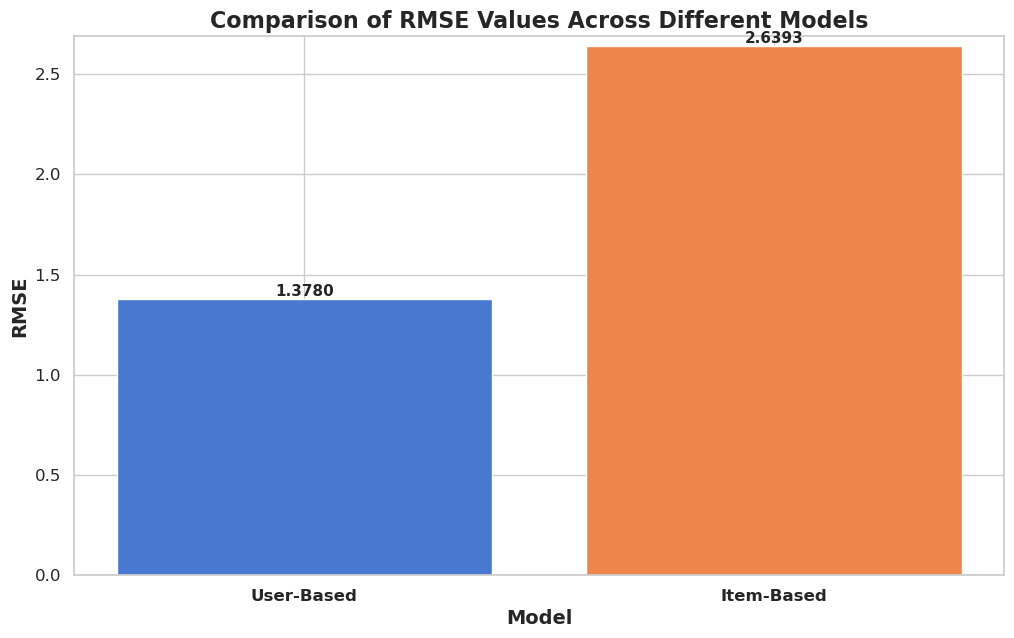

In [67]:
import matplotlib.pyplot as plt

# RMSE values for each model
rmse_values = {
    "User-Based": rmse_user,
    "Item-Based": rmse_item
}

# Enhancing the plot aesthetics using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 7))
bars = plt.bar(rmse_values.keys(), rmse_values.values(), color=sns.color_palette("muted"))

# Adding the RMSE scores on top of each bar without rounding
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f"{yval:.4f}", ha='center', va='bottom', fontsize=11, fontweight='bold')

# Customizing the plot
plt.xlabel('Model', fontsize=14, fontweight='bold')
plt.ylabel('RMSE', fontsize=14, fontweight='bold')
plt.title('Comparison of RMSE Values Across Different Models', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12)

max_val_list = list(rmse_values.values())
max_val = max_val_list[1]
if max_val_list[0]>max_val_list[1]:
    max_val = max_val_list[0]
    
plt.ylim(0, max_val + 0.05)
plt.show()